<a href="https://colab.research.google.com/github/ilaid58/gomycode_LabPhase/blob/main/LabPhase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [PHASE I](#1)
- [PHASE II](#2)
- [PHASE III](#3)

<a name=1></a>
#**Phase I**

In [2]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)
# data_by_artist, data, data_by_genres, data_by_year, data_w_genres
id_list = ['13n6hvWTMIFM1-snta5_BWWKppiW2CMBU', '19Q95OpXrs3Z5xJ7Wg1_4ZcO3gTdSsUvy', '1WEBcdr1VMuKSq_Z7CNCIvsDCi9LUh-6c',
           '1Wg0_PblHBr_wOW_cuqtkz95Jb5o2y_Cs', '1vsXAQpVGCEZ3iZwEKduyMxR5zY79ltCr']
file_list = ['data_by_artist', 'data', 'data_by_genres', 'data_by_year', 'data_w_genres']
for idx in range(len(id_list)):
  file_download = drive.CreateFile({'id':id_list[idx]})
  file_download.GetContentFile(file_list[idx]+'.csv')

##**1. Read the data**

In [4]:
import pandas as pd
import numpy as np

In [5]:
def read_data(files):
  for f in files:
    yield pd.read_csv(f+'.csv')

In [6]:
data_by_artist, data, data_by_genres, data_by_year, data_w_genres = read_data(file_list)

In [7]:
i = 0
for i_data in read_data(file_list):
  print(file_list[i])
  print(i_data)
  print('\n------------------------')
  i += 1

data_by_artist
       mode  count  acousticness  \
0         1      9      0.590111   
1         1     26      0.862538   
2         1      7      0.856571   
3         1     27      0.884926   
4         1      7      0.510714   
...     ...    ...           ...   
28675     1      2      0.512000   
28676     0      2      0.541000   
28677     1     11      0.785455   
28678     1      2      0.381000   
28679     1      2      0.568000   

                                                 artists  danceability  \
0                       "Cats" 1981 Original London Cast      0.467222   
1                              "Cats" 1983 Broadway Cast      0.441731   
2            "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3         "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4      "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   
...                                                  ...           ...   
28675                             

##**5. Display first two row of data, data_genre, year_data and artist _data**

###**data**

In [ ]:
data.head(2)

###**data_genre**

In [8]:
data_by_genres.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


###**year_data**

In [9]:
data_by_year.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


##**artists_data**

In [10]:
data_by_artist.head(2)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690,0.176212,103.044154,0.268865,30.576923,5


##**6. Retrieve information about data and genre_data**

###**infromation about data**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

###**information about data_genre**

In [12]:
data_by_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


##**7. create decade column in data using apply() and lambda**

In [13]:
decade = data_by_year['year'].apply(lambda x: (x//10)*10)
data_by_year['decade'] = decade

In [14]:
data_by_year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,decade
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2,1920
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10,1920
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0,1920
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1920
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0,2010
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1,2010
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1,2010
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1,2010


<a name=2></a>
#**Phase II**

In [15]:
import seaborn as sns
import plotly.express as px

##**1. Distribution of tracks accross different decade**

<Axes: xlabel='decade', ylabel='count'>

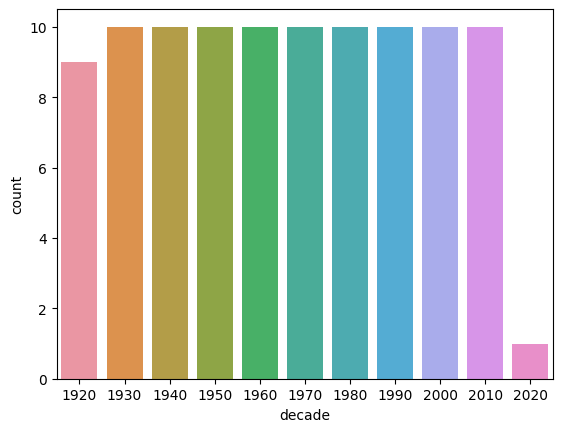

In [16]:
sns.countplot(data=data_by_year, x='decade')

##**2. Plot the trends of various sound features over decades**

In [17]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
px.line(data_by_year, x='year', y=sound_features)

##**3. Trend of loudness over decades**

In [18]:
px.line(data_by_year, x='year', y='loudness')

##**4. Trend of various sound features by top 10 genres based on popularity**

In [19]:
top_10 = data_by_genres.sort_values(['popularity'], ascending=False).head(10)

In [20]:
px.bar(top_10, x='genres', y=sound_features, barmode='group')

##**5. Generate word cloud of the genres**

In [21]:
!pip install wordcloud

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
from wordcloud.wordcloud import STOPWORDS
comment_words = data_by_genres['genres']
wordcloud_genres = WordCloud(width=800, height=800, background_color='white', max_words=40, min_font_size=10, collocations=False).generate(str(comment_words))

##**6. Plot the word cloud of the genres**

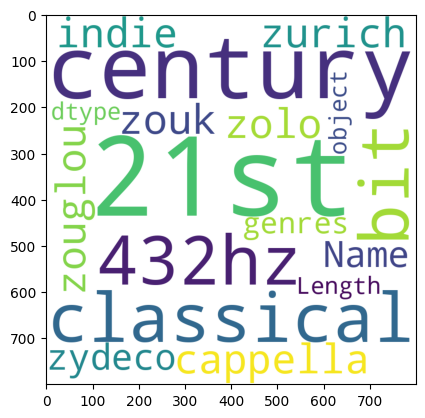

In [24]:
plt.imshow(wordcloud_genres)

#**7. Generate word cloud of the artists**

In [25]:
comment_words = data_by_artist['artists']
wordcloud_artists = WordCloud(width=800, height=800, background_color='white', min_word_length=3, max_words=40, min_font_size=10).generate(str(comment_words))

##**8. Plot the word cloud of artists**

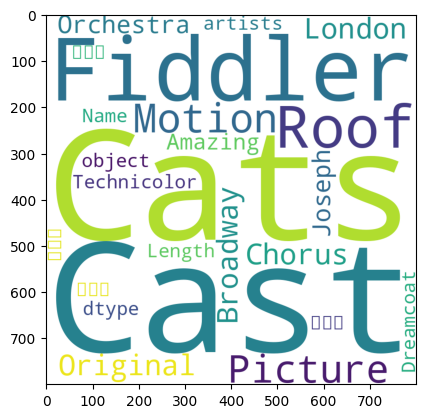

In [26]:
plt.imshow(wordcloud_artists)

##**9. Top 10 artists with the most songs produced**

In [27]:
top_10_artists = data_by_artist[['count', 'artists']].sort_values('count', ascending=False).head(10)

In [28]:
top_10_artists

,count,artists
8367,3169,Francisco Canaro
28561,2422,Эрнест Хемингуэй
28560,2136,Эрих Мария Ремарк
8434,1459,Frank Sinatra
10714,1256,Ignacio Corsini
27109,1200,Vladimir Horowitz
1682,1146,Arturo Toscanini
2707,1103,Billie Holiday
12378,1061,Johnny Cash
7426,1023,Elvis Presley


##**10. Top 10 artists with highest popularity score**

In [29]:
 top_10_popularity = data_by_artist[['artists', 'popularity']].sort_values('popularity', ascending=False).head(10)

In [30]:
top_10_popularity

,artists,popularity
20966,Ritt Momney,93.0
14354,Lele Pons,92.0
15070,Los Legendarios,90.0
11764,Jerry Di,89.0
28263,salem ilese,88.0
23687,Surf Mesa,88.0
7463,Emilee,88.0
213,A7S,87.0
26318,Towy,86.0
16453,Master KG,86.0


##**11. Conclusion**

- Sound features changes over year
- All songs are a least with minimum value for chiness electropop
- there are 3 instrumentalness (south african house, russian dance, guaracha)
- the top 10 artists who produced the most songs are not the top 10 artists who are popular

<a name=3></a>
#**Phase III**

##**1. Fit the kmean cluster in the genre data using 12 cluster**

In [31]:
# transform the 'genres' column into numerical value
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data_by_genres['genres_num'] = encode.fit_transform(data_by_genres['genres'])

# define features
features_genres = [i for i in data_by_genres.columns if i not in ['genres']]

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmean = KMeans(n_clusters=12)

In [34]:
y_labels = kmean.fit_predict(data_by_genres[features_genres])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [35]:
data_by_genres['labels'] = y_labels

##**2. Visualize clusters of genres**

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(data_by_genres[features_genres])

In [38]:
fig = px.scatter(x=x_tsne[:, 0], y=x_tsne[:, 1], color=y_labels)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

##**3. Fit kmean model on song data**

In [39]:
import ast

In [1]:
def get_features(df):

  artists_ = []
  for artist in df['artists']:
    for i in ast.literal_eval(artist):
      if i not in artists_:
        artists_.append(i)
  return artists_

def define_features(df_artists, artists_):

  m = len(df_artists['artists'])
  n = len(artists_)
  df = pd.DataFrame(np.zeros((m, n), dtype=int), columns = artists_)
  for song in df_artists.values:
    for artist in artists_:
      if artist in song[3]:
        df[artist].loc[song[0]] = 1
  return df

In [2]:
artists = get_features(data)
df = define_features(data_by_artist, artists)

NameError: ignored

In [42]:
df

,Sergei Rachmaninoff,James Levine,Berliner Philharmoniker,Dennis Day,KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat,Frank Parker,Phil Regan,John McCormack,Ignacio Corsini,Fortugé,...,Lenny Santos,Nueva Conducta,Tyler Rich,Clyde Boudreaux,Jackson Wang,LPB Poody,Frank Walker,Stephen Puth,Take A Daytrip,Najma Wallin
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = pd.concat([data, df], axis=1)

In [ ]:
features_data = data[i for i in data.columns if data[i].dtype!=object]

In [ ]:
kmeans = KMeans(25)
y_labels = kmeans.fit_predict(data[features_data])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)
x_pca = pca.fit_transform(data[features_data])

##**4. Visualize the cluster of songs**

In [ ]:
fig = px.scatter(x=x_pca[:, 0], y=x_pca[:, 1], color=y_labels)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()